In [75]:
#This file will examine charts of the top 200 songs globally and from 62 countries for the week of 07/10/2020
#to 07/16/20 to determine if there is a significant relation between where a song becomes popular and its global
#relevance.


#bringing in dependencies
import pandas as pd
import glob
import os

import csv
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import sys
import json
import re

In [76]:
#bringing in global chart
globalchart = os.path.join("WeeklyCharts", "Global Weekly Chart.csv")

#making it readable with pandas library
globalchart_df = pd.read_csv(globalchart)
globalchart_df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Note that these figures are generated using a formula that protects against any artificial inflation of chart positions.,Unnamed: 4
0,Position,Track Name,Artist,Streams,URL
1,1,ROCKSTAR (feat. Roddy Ricch),DaBaby,36999793,https://open.spotify.com/track/7ytR5pFWmSjzHJI...
2,2,Savage Love (Laxed - Siren Beat),Jawsh 685,34262951,https://open.spotify.com/track/1xQ6trAsedVPCdb...
3,3,Blinding Lights,The Weeknd,30727192,https://open.spotify.com/track/0VjIjW4GlUZAMYd...
4,4,Come & Go (with Marshmello),Juice WRLD,30027587,https://open.spotify.com/track/7y7w4tl4MaRC2UM...


In [77]:
#cleaning up chart a bit by removing unnecessary columns and correcting headers
globalchart_clean_df = globalchart_df.drop(columns=['Note that these figures are generated using a formula ' +
                                                    'that protects against any artificial inflation of chart ' +
                                                    'positions.', 'Unnamed: 4'])
globalchart_clean_df.rename(columns = {'Unnamed: 0' : 'Global - Rank', 'Unnamed: 1' :
                                       'Name of Track', 'Unnamed: 2' : 'Artist'}, inplace=True)


globalchart_clean_df.head(15)


,Global - Rank,Name of Track,Artist
0,Position,Track Name,Artist
1,1,ROCKSTAR (feat. Roddy Ricch),DaBaby
2,2,Savage Love (Laxed - Siren Beat),Jawsh 685
3,3,Blinding Lights,The Weeknd
4,4,Come & Go (with Marshmello),Juice WRLD
5,5,Watermelon Sugar,Harry Styles
6,6,Roses - Imanbek Remix,SAINt JHN
7,7,Wishing Well,Juice WRLD
8,8,Life's A Mess (feat. Halsey),Juice WRLD
9,9,Conversations,Juice WRLD


In [78]:
#Now working on making the data more readable in the files so that we can look at it holistically

#accessing all files in folder
allFiles = glob.glob(os.path.join("WeeklyCharts","*.csv"))

#adding them to a list
chart_list = []

for file in allFiles:
    chart_list.append(file)
chart_list.sort()


#getting a list of just the countries for later
country_list = []

for country in chart_list:
    name = country
    y = re.split('/| Weekly C|', name)
    country_list.append(y[1])
country_list.sort()


/Applications/anaconda3/envs/PythonData/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [79]:
#Now let's repeat the process we did with the global chart with all the countries' charts

#establishing counter for country header labels
i = 0

#setting up final df before loop
total_chart_df = pd.DataFrame()
total_chart_df = pd.concat([globalchart_clean_df, total_chart_df], axis = 1)

#looping to save time yay
for country in chart_list:
    
    country_df = pd.read_csv(country)
    
#still struggling to have same command on different lines so it's just long, sorry
    country_df = country_df.drop(columns=['Note that these figures are generated using a formula that protects ' +
                                          'against any artificial inflation of chart positions.', 'Unnamed: 4', 
                                          'Unnamed: 2'])

#Is there a cleaner way to do this? Maybe having headers for each DF, but wasn't sure how to go
#about that so formatting is a little iffy
    country_df = country_df.rename(columns = {'Unnamed: 0' : country_list[i] + ' - Rank', 'Unnamed: 1' : 
                                              'Name of Track'})
 
    i = i + 1
    
    total_chart_df = pd.merge(total_chart_df, country_df.drop_duplicates(subset=["Name of Track"], keep='first'), 
                                how='outer', on="Name of Track") #this merges on song name

#removing duplicate labelings

total_chart_df = total_chart_df.iloc[1:]

#replacing NaN values with 201 since we are looking at the top 200 songs
total_chart_df = total_chart_df.fillna(201)

#final chart
total_chart_df = total_chart_df.set_index(['Name of Track','Artist'])

total_chart_df

#total_chart_df_t = total_chart_df.transpose()
#total_chart_df_t



,,Global - Rank_x,Argentina - Rank,Australia - Rank,Austria - Rank,Belgium - Rank,Bolivia - Rank,Brazil - Rank,Bulgaria - Rank,Canada - Rank,Chile - Rank,...,Spain - Rank,Sweden - Rank,Switzerland - Rank,Taiwan - Rank,Thailand - Rank,Turkey - Rank,UK - Rank,USA - Rank,Uruguay - Rank,Vietnam - Rank
Name of Track,Artist,,,,,,,,,,,,,,,,,,,,,
ROCKSTAR (feat. Roddy Ricch),DaBaby,1,62,1,3,1,99,67,1,1,132,...,51,3,2,33,80,139,1,7,75,129
Savage Love (Laxed - Siren Beat),Jawsh 685,2,129,2,1,2,78,74,10,5,154,...,99,1,1,20,55,201,2,29,137,28
Blinding Lights,The Weeknd,3,23,7,10,4,12,36,3,13,18,...,32,4,4,53,85,37,8,23,33,92
Come & Go (with Marshmello),Juice WRLD,4,201,3,11,26,201,201,15,2,201,...,201,7,20,69,145,201,3,1,201,82
Watermelon Sugar,Harry Styles,5,22,5,12,7,63,34,5,8,57,...,121,15,11,52,95,201,4,22,38,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Anh Đợi Em Được Không,201,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,195
Buồn Làm Chi Em Ơi,201,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,196
Liệu Giờ,201,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,197


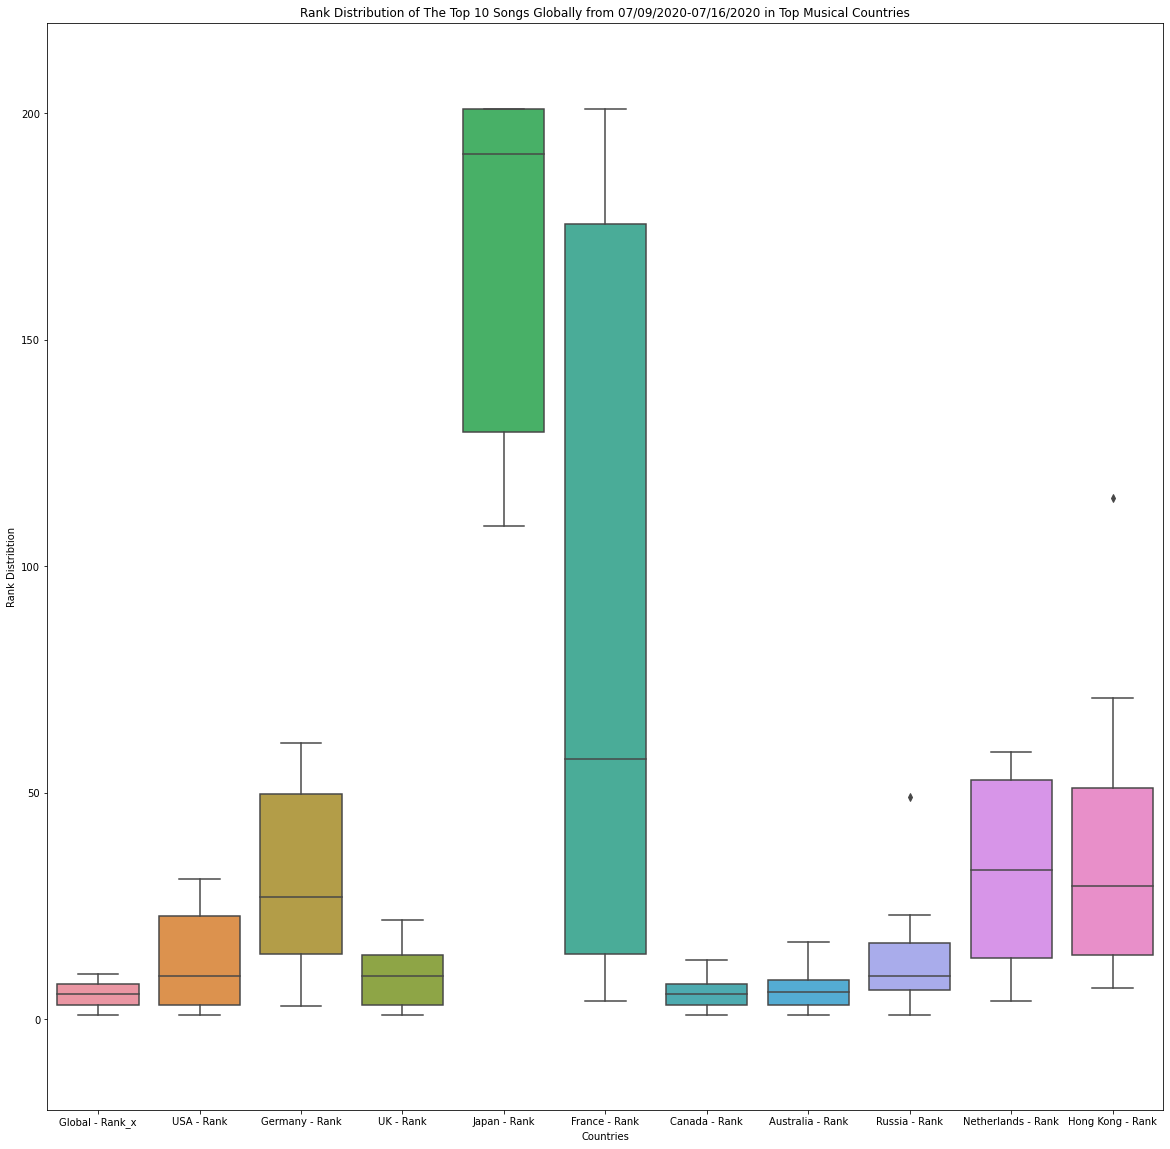

In [80]:
#Now that we have our data compiled and sorted, we can begin looking at it statistically

#So I'm thinking that we have several questions we could examine...


#We can look at the distribution of these songs compared to the global rankings in particular countries to see if it 
#there is a relation in terms of 



#getting data from top 10 songs on global playlist
topsongs_df = total_chart_df.iloc[0:10]
topsongs_df = topsongs_df.astype('int32')



#choosing these countries based on article (https://www.usnews.com/news/best-countries/slideshows/top-10-most-musical-countries)
df = topsongs_df[['Global - Rank_x', 'USA - Rank', 'Germany - Rank','UK - Rank', 'Japan - Rank', 'France - Rank',
                  'Canada - Rank', 'Australia - Rank', 'Russia - Rank', 'Netherlands - Rank','Hong Kong - Rank']]


#plotting boxplot for comparison of country distributions to global 
plt.figure(figsize=(20,20))
plt.title("Rank Distribution of The Top 10 Songs Globally from 07/09/2020-07/16/2020 in Top Musical Countries")
plt.xlabel("Countries")
plt.ylabel("Rank Distribtion")
plt.ylim(-20,220)
plt.xlim(-20,220)
sns.boxplot(data=df)




LinregressResult(slope=-1.3333333333333333, intercept=20.733333333333334, rvalue=-0.34358562822619454, pvalue=0.3310249642170148, stderr=1.2884882693303887)

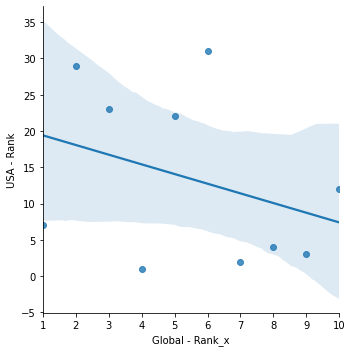

In [81]:
#based on the chart above, it appears that Canada, Australia, and the UK seem to have the strongest correlations. 
#Let's check.

#shows comparison between all countries in scatter plot, pretty cool
#sns.pairplot(df, kind="scatter")
#plt.show();


#This will look at USA relations with the Global hits

sns.lmplot(x='Global - Rank_x', y='USA - Rank', data=df)
#np.corrcoef(df['Global - Rank_x'], df['USA - Rank']) 

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['USA - Rank'])


LinregressResult(slope=6.418181818181819, intercept=-5.0000000000000036, rvalue=0.9247398957387749, pvalue=0.00012807524059594332, stderr=0.933933297917296)

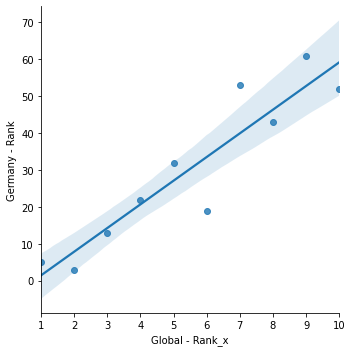

In [82]:
#This will look at Germany relations with the Global hits
sns.lmplot(x='Global - Rank_x', y='Germany - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['Germany - Rank'])

LinregressResult(slope=1.7454545454545456, intercept=-0.20000000000000107, rvalue=0.7554606755491736, pvalue=0.011505387662043558, stderr=0.5352067647103647)

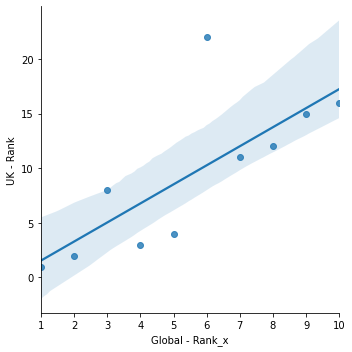

In [83]:
#This will look at UK relations with the Global hits

sns.lmplot(x='Global - Rank_x', y='UK - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['UK - Rank'])

LinregressResult(slope=11.066666666666668, intercept=108.13333333333333, rvalue=0.863523489389934, pvalue=0.001283072371571684, stderr=2.285041387243159)

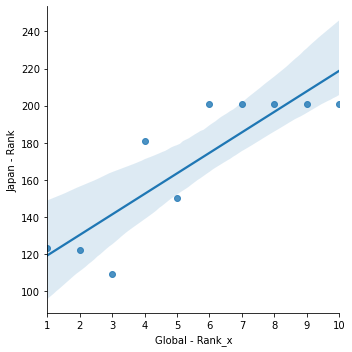

In [84]:
#This will look at Japan relations with the Global hits

sns.lmplot(x='Global - Rank_x', y='Japan - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['Japan - Rank'])

LinregressResult(slope=19.369696969696967, intercept=-20.333333333333314, rvalue=0.6922802653013667, pvalue=0.02651835701515429, stderr=7.138544992485074)

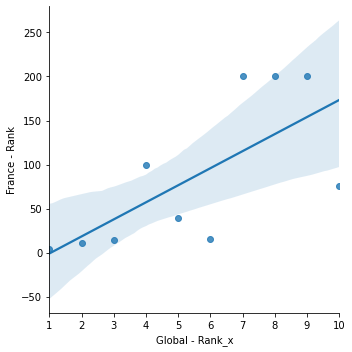

In [85]:
#This will look at France relations to the Global hits

sns.lmplot(x='Global - Rank_x', y='France - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['France - Rank'])

LinregressResult(slope=0.4181818181818182, intercept=3.7999999999999994, rvalue=0.3155425479505095, pvalue=0.37446841501552, stderr=0.4446188822049994)

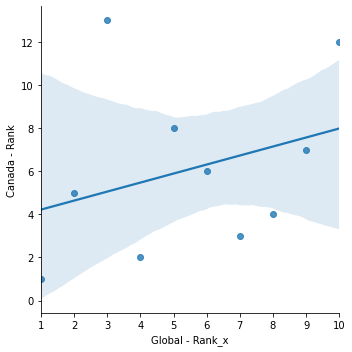

In [86]:
#This will look at Canada relations to the Global hits

sns.lmplot(x='Global - Rank_x', y='Canada - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['Canada - Rank'])

LinregressResult(slope=1.3151515151515154, intercept=-0.5333333333333341, rvalue=0.8241186410211404, pvalue=0.0033660815206674553, stderr=0.3195784643208418)

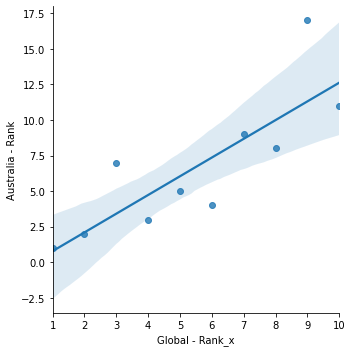

In [87]:
#This will look at Australia relations to Global hits

sns.lmplot(x='Global - Rank_x', y='Australia - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['Australia - Rank'])

LinregressResult(slope=3.3636363636363638, intercept=-4.4, rvalue=0.725594351403914, pvalue=0.017534766094198465, stderr=1.1278102335344427)

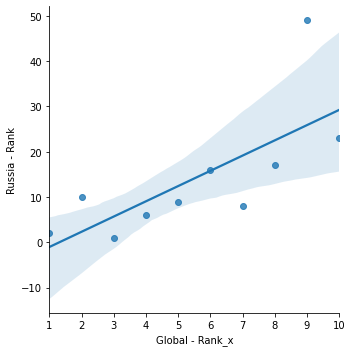

In [88]:
#This will look at Russia's relation to the Global Hits

sns.lmplot(x='Global - Rank_x', y='Russia - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['Russia - Rank'])

LinregressResult(slope=6.072727272727273, intercept=-0.4000000000000057, rvalue=0.8603790772691544, pvalue=0.0013998968077233195, stderr=1.271817856910739)

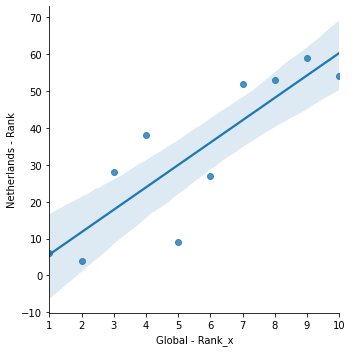

In [89]:
#This will look at Netherlands' relation to the Global hits

sns.lmplot(x='Global - Rank_x', y='Netherlands - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['Netherlands - Rank'])

LinregressResult(slope=8.181818181818182, intercept=-6.600000000000001, rvalue=0.7313822016625025, pvalue=0.016226012983655128, stderr=2.697269305795952)

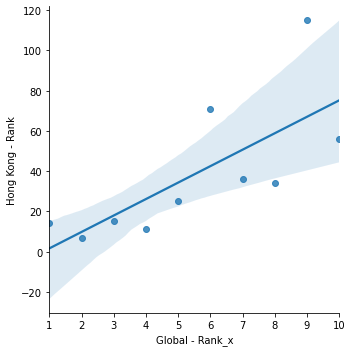

In [90]:
#This will look at Hong Kong's relation with the Global hits

sns.lmplot(x='Global - Rank_x', y='Hong Kong - Rank', data=df)

from scipy.stats import linregress
linregress(df['Global - Rank_x'], df['Hong Kong - Rank'])

In [165]:
#We could look at some of the top songs in the global playlist and run a test on rank placement
#distribution for countries listed

#We can look at the base average rank for the top 10 songs in the global playlist and compare average rank 
#in top musical countries

#gives general sense of song rankings and chart correlations

#topsongs_df

descriptor = topsongs_df.describe()
average = topsongs_df.mean(axis=0)
topsongs_corr = topsongs_df.corr()

#print(choose one from above for reference)

#setting list for top 200 songs
topsongs200_df = total_chart_df.iloc[0:200]
topsongs200_df = topsongs200_df.astype('int32')

#running Welch's t-test between top musical countries and Global distributions for top 200 songs (aka global list)

#getting individual countries' charts and making sure they're int values
glob = topsongs200_df['Global - Rank_x'].astype('int32')
usa = topsongs200_df['USA - Rank'].astype('int32')
germany = topsongs200_df['Germany - Rank'].astype('int32')
uk = topsongs200_df['UK - Rank'].astype('int32')
japan = topsongs200_df['Japan - Rank'].astype('int32')
france = topsongs200_df['France - Rank'].astype('int32')
canada = topsongs200_df['Canada - Rank'].astype('int32')
aus = topsongs200_df['Australia - Rank'].astype('int32')
russia = topsongs200_df['Russia - Rank'].astype('int32')
neth = topsongs200_df['Netherlands - Rank'].astype('int32')
hk = topsongs200_df['Hong Kong - Rank'].astype('int32')

#welch's t-tests
#sts.ttest_ind(aus, glob, equal_var = False)
sts.jarque_bera()

Jarque_beraResult(statistic=152.86676852183274, pvalue=0.0)

In [ ]:
#We can look at stream numbers (not listed here but available) relative to population, because that figure
#may be a more accurate representation of popularity potentially

In [ ]:
#We could compare based on national tongue (does this have an impact on what songs are popular? - I noticed
#when looking at the data that certain songs were)